In [24]:
# 2018-09-20
# A. Pendleton
# Processing Kallisto Transcript Assessments
#    500kb max intron de novo transcrips

In [25]:
#this uses iPython magic to make plots appear inline
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import sys
import numpy as np
import matplotlib.patches as patches
import gzip
import fileinput
import glob
from scipy import stats
import re
from matplotlib_venn import venn3, venn3_circles
from collections import OrderedDict


def count_lines(f):
    lineCount = 0
    with open(f, 'r') as f:
        for line in f:
            lineCount += 1
        return lineCount
def runCMD(cmd):
    val = subprocess.Popen(cmd, shell=True).wait()
    if val == 0:
        pass
    else:
        print ('command failed')
        print (cmd)
        sys.exit(1)
# TO REMOVE TOP AND RIGHT AXIS OF PLOTS
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

In [4]:
def get_sample_info():
    #Reading in the RNA-Seq library IDs
    sampleInfo = '/home/ampend/links/kidd-lab/ampend-projects/Novel_Sequence_Analysis/rna-seq/SampleInfoTable.txt'
    sampleDict, tissueDict, samples = {}, {}, []

    for line in open(sampleInfo, 'r'):
        if 'Bio' in line: #skips header
            continue
        line=line.rstrip().split()
        ID = line[4]
        #Rename some tissues to shorter name
        tissue = line[5]
        
        if 'SmoothMuscle' in tissue:
            shortTissue = 'SM'
        if 'Unidentified' in tissue:
            shortTissue = 'NA'
        if 'Blood' in tissue:
            shortTissue = 'BL'
        if 'Brain' in tissue:
            shortTissue = 'BR'
        if 'Heart' in tissue:
            shortTissue = 'HT'
        if 'Ovary' in tissue:
            shortTissue = 'OV'
        if 'Skin' in tissue:
            shortTissue = 'SK'
        if 'Kidney' in tissue:
            shortTissue = 'KD'
        if 'Testis' in tissue:
            shortTissue = 'TS'
        if 'Liver' in tissue:
            shortTissue = 'LV'
        if 'Lung' in tissue:
            shortTissue = 'LG'
        sampleDict[ID] = []
        sampleDict[ID].append(tissue)
        sampleDict[ID].append(shortTissue)
        samples.append(ID)
        
        if tissue not in tissueDict.keys():
            tissueDict[tissue] = []
        tissueDict[tissue].append(ID)

    print('%i samples added to a sample array from the following tissues:\n' % len(samples))

    genomes = ['zoey-2.3','canFam3.1-noY']

    for tissue in tissueDict.keys():
        print(tissue)

    return sampleDict, tissueDict, genomes



## Reading in Library/Sample Information

In [5]:
#Reading in library information
sampleDict, tissueDict, genomes = get_sample_info()

samples=[]
for key in sampleDict.keys():
    samples.append(key)

42 samples added to a sample array from the following tissues:

Brain
Blood
Ovary
Lung
Skin
Liver
Kidney
Testis
Heart
Unidentified
SmoothMuscle


## Reading in Kallisto Results

In [6]:
# function to count elements within given range
def countInRange(arr, n, x, y):
    # initialize result
    count = 0 
    for i in range(n):
        # check if element is in range
        if (arr[i] >= x and arr[i] < y):
            count += 1
    return count
def plot_sample_tpms(arr,sampleID,plotFile):
    #PLOT
    fig = plt.figure(figsize=(12, 8)) #Set up subplots for below distributions
    ax = fig.add_subplot(111)
    _ = plt.hist(tpms, 1500, facecolor='green', alpha=0.75)
    plt.title('Zoey Transcript TPMs - Sample %s' % sample)
    plt.xlabel('TPM')
    plt.ylabel('Count')
    plt.xlim(1,10000)
    plt.ylim(0,200)
    simpleaxis(ax)
    plt.tight_layout()
    plt.savefig(plotFile,transparent=True) #save    
    
    #Print out stats
    print('\n####Sample -- %s' % sample)
    print('Minimum TPM = ', min(tpms))
    print('Maximum TPM = ', max(tpms))
    print('Average TPM = ', np.mean(tpms))
    print('Median TPM = ', np.median(tpms))

def get_size_ranges(arr):
    count = countInRange(tpms, len(tpms), 0, .9999)
    print('%i less than 1.0 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 1, 10)
    print('%i between 1-10 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 10, 50)
    print('%i less than 10-50 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 50, 100)
    print('%i between 50-100 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 100, 150)
    print('%i between 100-150 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 150, 200)
    print('%i between 150-200 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 200, 250)
    print('%i between 200-250 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 250, 300)
    print('%i between 250-300 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 300, 350)
    print('%i between 300-350 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 350, 1000000000)
    print('%i over 350 tpm' % count)

In [7]:
"""
OLD DATA
kalDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/Kalisto/'
resultsDir = kalDir + 'results/'

samplesProcessed = []
for files in glob.glob(resultsDir + 'SRR*'):
    samplesProcessed.append(files.replace(resultsDir,''))
    
print('%i samples processed through Kallisto' % len(samplesProcessed))
"""

"""##100kb introns
kalDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Kalisto/'
resultsDir = kalDir + 'results/'

samplesProcessed = []
for files in glob.glob(resultsDir + 'SRR*'):
    samplesProcessed.append(files.replace(resultsDir,''))
    
print('%i samples processed through Kallisto' % len(samplesProcessed))"""


"##100kb introns\nkalDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Kalisto/'\nresultsDir = kalDir + 'results/'\n\nsamplesProcessed = []\nfor files in glob.glob(resultsDir + 'SRR*'):\n    samplesProcessed.append(files.replace(resultsDir,''))\n    \nprint('%i samples processed through Kallisto' % len(samplesProcessed))"

In [8]:
#500kb introns
kalDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/version3_intron500k/Kalisto/'
resultsDir = kalDir + 'results/'

samplesProcessed = []
for files in glob.glob(resultsDir + 'SRR*'):
    samplesProcessed.append(files.replace(resultsDir,''))
    
print('%i samples processed through Kallisto' % len(samplesProcessed))

42 samples processed through Kallisto


In [9]:
#CALCULATE STATS AND DRAW PLOTS PER SAMPLE
sampleCount = 0

tpmDict = {}

plotDir = resultsDir + '../plots/'
cmd = 'mkdir -p %s' % plotDir #Generate the directory in case it already isn't there
runCMD(cmd)

for sample in samplesProcessed:
    tpms = [] #clear per sample
    sampleCount += 1
    print(sample)
    
    inFile = resultsDir + sample + '/' + 'abundance.tsv'
    for line in open(inFile,'r'):
        if 'target_id' in line:
            continue
        line=line.rstrip().split('\t')
        transcript = line[0]
        tpm = float(line[4])
        #if only the first sample, create key for the gene
        if sampleCount == 1:
            #0 = library expression TPMs, Pass/Fail CD-Hit
            tpmDict[transcript] = [[],'Fail','','','','']
        #If expressed at tpm > 1, add to dictionary
        if tpm > 1.0:
            tpmDict[transcript][0].append(tpm) #add TPM to total dictionary      
        tpms.append(tpm) #add TPM to per saple array for stats (below)
    
    #Plot the TPM distribution
    plotFile = plotDir + sample + '_TPM_Histogram.png'
    
    ###UNCHECK THESE WHEN DOING FIRST ANALYSIS -- TAKES A WHILE
    #plot_sample_tpms(tpms,sample,plotFile)
    #get_size_ranges(tpms)
    

SRR388764
SRR388740
SRR388754
SRR388755
SRR388739
SRR388748
SRR388763
SRR388745
SRR388752
SRR543733
SRR388736
SRR388743
SRR388738
SRR388747
SRR388744
SRR388761
SRR388751
SRR388737
SRR388734
SRR388766
SRR388749
SRR536884
SRR388762
SRR388756
SRR388757
SRR388742
SRR388759
SRR536882
SRR388735
SRR388746
SRR388741
SRR536881
SRR543732
SRR388765
SRR388753
SRR543734
SRR388758
SRR388760
SRR536885
SRR543735
SRR536883
SRR388750


### Identify how many transcripts are NOT expressed in at least one library with TPM >1


In [10]:
count0,count1,count2,count3,count10,countAll = 0,0,0,0,0,0
counts = []
#outFileDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Kalisto/results/'
outFileDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/version3_intron500k/Kalisto/results/'
outfile = outFileDir + 'ExpressedInAtLeastOneSample_KallistoTPMEstimates_TrinityTranscripts.txt'
outfile2 = outFileDir + 'ExpressedInAtLeastTWOSample_KallistoTPMEstimates_TrinityTranscripts.txt'
outfile2 = outFileDir + 'ExpressedInAtLeastTHREESample_KallistoTPMEstimates_TrinityTranscripts.txt'

outFile = open(outfile,'w')
outFile2 = open(outfile2,'w')


for transcript in tpmDict:
    libraryCount = len(tpmDict[transcript][0])
    if libraryCount == 0:
        count0+=1
    if libraryCount >= 1:
        count1+=1
        outFile.write(transcript + '\n')
    if libraryCount >= 2:
        count2+=1
        outFile2.write(transcript + '\n')
    if libraryCount >= 3:
        count3+=1
        outFile2.write(transcript + '\n')
    if libraryCount >= 10:
        count10+=1
    if libraryCount == 42:
        countAll += 1
    counts.append(libraryCount)
outFile.close()
outFile2.close()

print('%i (%f%%) transcripts expressed in ZERO libraries' % (count0,100*float(count0)/len(tpmDict.keys())))
print('%i (%f%%) transcripts expressed in ONE or more library' % (count1,100*float(count1)/len(tpmDict.keys())))
print('%i (%f%%) transcripts expressed in TWO or more libraries' % (count2,100*float(count2)/len(tpmDict.keys())))
print('%i (%f%%) transcripts expressed in THREE or more libraries'% (count3,100*float(count3)/len(tpmDict.keys())))
print('%i (%f%%) transcripts expressed in TEN or more libraries'% (count10,100*float(count10)/len(tpmDict.keys())))
print('%i (%f%%) transcripts expressed in ALL libraries'% (countAll,100*float(countAll)/len(tpmDict.keys())))


2067 (4.548555%) transcripts expressed in ZERO libraries
43376 (95.451445%) transcripts expressed in ONE or more library
42459 (93.433532%) transcripts expressed in TWO or more libraries
41424 (91.155954%) transcripts expressed in THREE or more libraries
25098 (55.229628%) transcripts expressed in TEN or more libraries
3272 (7.200229%) transcripts expressed in ALL libraries


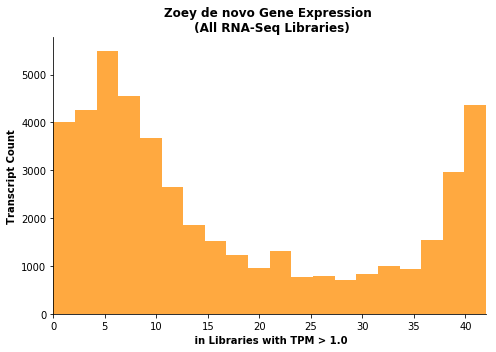

In [10]:
fig = plt.figure(figsize=(7, 5)) #Set up subplots for below distributions
ax = fig.add_subplot(111)
_ = plt.hist(counts, 20, facecolor='darkorange', alpha=0.75)
plt.title('Zoey de novo Gene Expression \n (All RNA-Seq Libraries)',fontweight='bold')
plt.xlabel(' in Libraries with TPM > 1.0',fontweight='bold')
plt.ylabel('Transcript Count',fontweight='bold')
plt.xlim(0,42)
simpleaxis(ax)
plt.tight_layout()
#plt.savefig(plotFile,transparent=True) #save

## Expression patterns based off of Transdecoder scores and definitions

In [11]:
geneFile = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/version3_intron500k/transdecoder/results/pasa-lite_ZoeyTrinity.pasa_assembled_alignments.fa.transdecoder.pep'
pepDict = {}

for line in open(geneFile,'r'):
    if '>' not in line: #info is in the seq id > line
        continue
    line=line.rstrip().split(' ')

    gene = line[0].replace('>','')
    orfType = line[4].split(':')[1]
    length = int(line[5].split(':')[1])
    orient = line[6].split(',')[0].replace('(','').replace(')','')
    score = float(line[6].split('=')[1])
    
    if gene in tpmDict.keys():
        pepDict[gene] = {}
        pepDict[gene]['orfType'] = orfType
        pepDict[gene]['length'] = length
        pepDict[gene]['orient'] = orient
        pepDict[gene]['score'] = score
        #pepDict[gene]['expValues'] = tpmDict[gene][0]
        pepDict[gene]['libExpCount'] = len(tpmDict[gene][0])
        
        #Calculate average exp == sum of all TPMs / 42 (42 total libraries)
        sumExp = 0
        for i in range(0,len(tpmDict[gene][0])):
            sumExp += i

        pepDict[gene]['avgExpTPM'] = sumExp/42.
print('%i gene models added to pepDict' % len(pepDict.keys()))

45443 gene models added to pepDict


# Generating bar chart of # of libraries with >1.0 TPM

In [33]:
fiveprime,threeprime,internal,complete = [], [], [], []

for gene in pepDict.keys():
    if 'complete' in pepDict[gene]['orfType']:
        complete.append(pepDict[gene]['libExpCount'])
    if 'internal' in pepDict[gene]['orfType']:
        internal.append(pepDict[gene]['libExpCount'])
    if '5' in pepDict[gene]['orfType']:
        fiveprime.append(pepDict[gene]['libExpCount'])
    if '3' in pepDict[gene]['orfType']:
        threeprime.append(pepDict[gene]['libExpCount'])

print('complete = ',len(complete))
print('internal = ',len(internal))
print('five prime = ',len(fiveprime))
print('three prime = ',len(threeprime))

#df = pd.DataFrame({'fiveprime':fiveprime, 'threeprime':threeprime, 'complete':complete, 'internal':internal})

my_dict = dict( A = complete, B = internal, C= threeprime, D = fiveprime) 
df = pd.DataFrame.from_dict(my_dict, orient='index')


df2 = df.transpose()
df2.columns = ['complete','internal','fiveprime','threeprime']
df2.head()

complete =  22620
internal =  5953
five prime =  13424
three prime =  3446


,complete,internal,fiveprime,threeprime
0,0.0,9.0,6.0,42.0
1,36.0,23.0,6.0,0.0
2,7.0,11.0,15.0,6.0
3,7.0,6.0,39.0,26.0
4,9.0,29.0,9.0,16.0


### Pie chart based off of ORF type

count sum = (3prime_partial, 5prime_partial, internal, complete ) (3446, 13424, 22620, 5953)


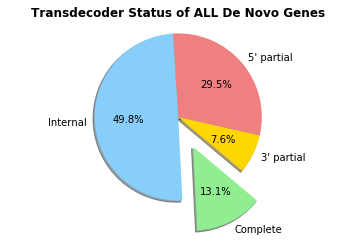

In [30]:
threeprime,fiveprime,internal,complete = 0, 0, 0, 0

for gene in pepDict.keys():    
    if pepDict[gene]['orfType'] == '3prime_partial':
        threeprime += 1
        continue
    if pepDict[gene]['orfType'] == '5prime_partial':
        fiveprime += 1
        continue
    if pepDict[gene]['orfType'] == 'complete':
        internal += 1
        continue
    if pepDict[gene]['orfType'] == 'internal':
        complete += 1
        continue
    else:
        print('ERROR: What else is there?')
        print(gene,pepDict[gene])

print('count sum = (3prime_partial, 5prime_partial, internal, complete )', (threeprime, fiveprime, internal, complete))


#Make pie chart
labels = '3\' partial', '5\' partial', 'Internal', 'Complete'
sizes = [threeprime, fiveprime, internal, complete]
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']
explode = (0, 0, 0, 0.4)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=320)
plt.title('Transdecoder Status of ALL De Novo Genes', fontweight='bold') 
plt.axis('equal')
plt.show()

### Plot #libraries with expression >1TPM from across 42 libraries 
###    based on the ORF type called by Transdecoder

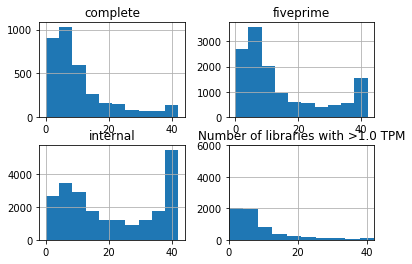

In [34]:
df2.hist()
plt.xlim(0,42)
plt.ylim(0,6000)
plt.show()

In [ ]:
df2.hist()
plt.xlim(0,42)
plt.ylim(0,6000)
plt.show()

complete =  22620
internal =  5953
five prime =  13424
three prime =  3446


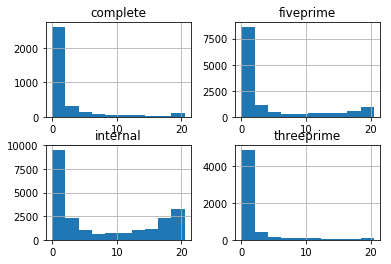

In [37]:
fiveprime,threeprime,internal,complete = [], [], [], []

for gene in pepDict.keys():
    if 'complete' in pepDict[gene]['orfType']:
        complete.append(pepDict[gene]['avgExpTPM'])
    if 'internal' in pepDict[gene]['orfType']:
        internal.append(pepDict[gene]['avgExpTPM'])
    if '5' in pepDict[gene]['orfType']:
        fiveprime.append(pepDict[gene]['avgExpTPM'])
    if '3' in pepDict[gene]['orfType']:
        threeprime.append(pepDict[gene]['avgExpTPM'])

print('complete = ',len(complete))
print('internal = ',len(internal))
print('five prime = ',len(fiveprime))
print('three prime = ',len(threeprime))

#df = pd.DataFrame({'fiveprime':fiveprime, 'threeprime':threeprime, 'complete':complete, 'internal':internal})

my_dict = dict( A = complete, B = internal, C= threeprime, D = fiveprime) 
df = pd.DataFrame.from_dict(my_dict, orient='index')


df2 = df.transpose()
df2.columns = ['complete','internal','fiveprime','threeprime']
df2.head()

df2.hist()
plt.show()